In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [3]:
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

8.07 ms ± 85.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


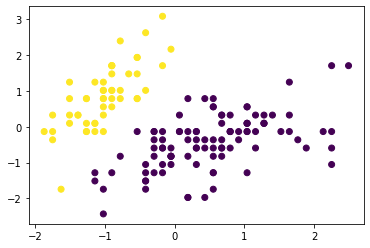

In [13]:
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.show()

17.7 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


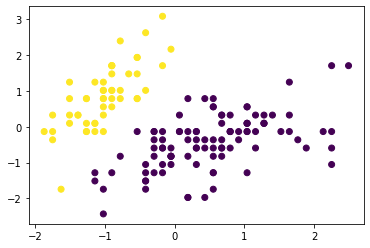

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.show()

**Hemen hemen aynı sonucu verdiler ancak MiniBatchKMeans daha yavaş çalıştı.**

**k sayısını arttırarak deneyelim.**

In [18]:
kmeans_cluster = KMeans(n_clusters=4, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

16.4 ms ± 568 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


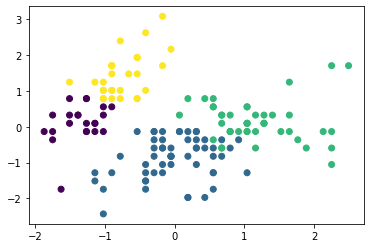

In [19]:
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.show()

19 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


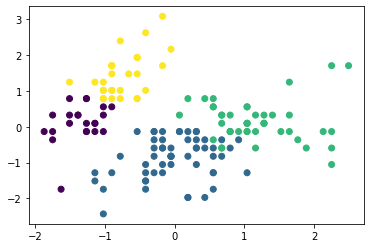

In [20]:
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.show()

**Ayrılacak küme sayısını arttırdığımızda işlem yapma süresi uzadı ve pek de sağlıklı şekilde ayırmadı. Bir de 3 kümeye ayırarak hepsini karşılaştıralım.**

In [21]:
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

11.8 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


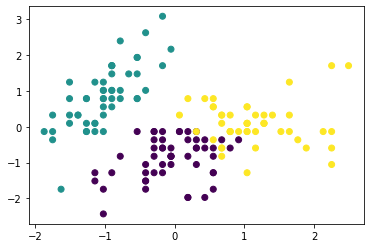

In [22]:
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.show()

19.3 ms ± 558 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


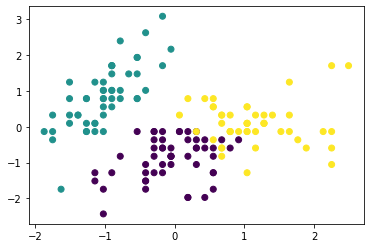

In [23]:
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.show()

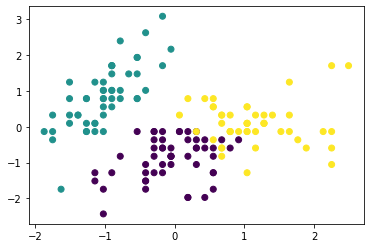

In [24]:
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.show()

**Sarı ve mor olanlarda hafif bir iç içelik gözlemlense de yine de güzel bir sonuç verdi. KMeans'in çalışma süresi MiniBatchKMeans'e göre daha kısa oldu.**